In [2]:
import numpy as np
import pandas as pd

# Import Data

In [3]:
df = pd.read_csv('data/arabic/data_1.csv')
df_2 = pd.read_csv('data/arabic/data_2.csv')
df_3 = pd.read_csv('data/arabic/data_3.csv')
df_4 = pd.read_csv('data/arabic/data_4.csv')

In [4]:
df = pd.concat([df,df_2,df_3,df_4])

In [5]:
df.head()

,Unnamed: 0,rating,Arabic review,no,English review
0,0.0,5.0,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...,0.0,A wonderful book. I think that the whole novel...
1,1.0,4.0,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...,1.0,"Novel touches the soul Bamgaha, proud that I f..."
2,2.0,5.0,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...,2.0,A novel court every shortcut. It was my favori...
3,3.0,3.0,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...,3.0,"This book is sad bitter, injustice and persecu..."
4,4.0,4.0,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...,4.0,Novel and represent a realistic and fantastic ...


In [6]:
len(df)

80003

# Clustering K-means

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [152]:
document = []
for sent in df['English review']:
    document.append(sent)

In [154]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(document)

In [155]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=10000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [156]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [157]:
for i in range(true_k):
    print('Cluster % d:' % i),
    for ind in order_centroids[i, :10]:
         print(' %s' % terms[ind])

Cluster  0:
 book
 read
 beautiful
 love
 did
 wonderful
 life
 god
 story
 novel
Cluster  1:
 value
 ẓyyyyyyyyyyyyymh
 culturing
 cultivate
 cultivated
 cultivating
 cultivation
 cultu
 cultural
 culturally
Cluster  2:
 bs
 mesh
 elly
 novel
 sweet
 need
 end
 ahmed
 aktar
 possible
Cluster  3:
 loading
 ẓyyyyyyyyyyyyymh
 cultures
 cult
 cultivate
 cultivated
 cultivating
 cultivation
 cultu
 cultural
Cluster  4:
 novel
 read
 events
 wonderful
 writer
 end
 beautiful
 did
 style
 reading


# Category Specific

In [165]:
def kmeans(sents,num_clusters):
    #make document
    document = []
    for sent in sents['English review']:
        document.append(sent)
    
    #vectorize
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(document)
    
    #define model
    model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=10000, n_init=1)
    model.fit(X)
    
    #get centroids
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    #print clusters
    for i in range(num_clusters):
        print('Cluster % d:' % i),
        for ind in order_centroids[i, :10]:
             print(' %s' % terms[ind])
    
    #return clusters
    return (order_centroids,terms)

## POSITIVE

In [169]:
cents_terms = {}
pos = df[df['rating']>3]
cents_terms['pos'] = kmeans(pos,5)

Cluster  0:
 loading
 ẓyyyyyyyyyyyyymh
 demagoguery
 delusional
 delusions
 deluxe
 delve
 delves
 delving
 dema
Cluster  1:
 book
 love
 read
 novel
 did
 god
 life
 wonderful
 story
 know
Cluster  2:
 wonderful
 fantastic
 book
 novel
 word
 style
 sense
 read
 beautiful
 reading
Cluster  3:
 novel
 read
 beautiful
 events
 end
 writer
 novels
 style
 ahmed
 wonderful
Cluster  4:
 great
 novel
 really
 read
 book
 word
 sense
 writer
 style
 end


## NEGATIVE

In [172]:
neg = df[df['rating']<3]
cents_terms['neg'] = kmeans(neg,5)

Cluster  0:
 book
 read
 did
 writer
 atheist
 articles
 reading
 like
 books
 beautiful
Cluster  1:
 loading
 گdrt
 distracted
 distressed
 distress
 distractor
 distractions
 distracting
 distract
 distributed
Cluster  2:
 mesh
 elly
 bs
 novel
 need
 sweet
 boring
 ashan
 read
 aktar
Cluster  3:
 novel
 did
 read
 writer
 events
 like
 end
 style
 story
 language
Cluster  4:
 novel
 love
 read
 did
 story
 end
 like
 style
 time
 writer


## NEUTRAL

In [173]:
neu = df[df['rating']==3]
cents_terms['neu'] = kmeans(neu,5)

Cluster  0:
 ahmed
 murad
 novel
 elephant
 blue
 dust
 events
 style
 end
 diamond
Cluster  1:
 loading
 گant
 djaan
 djaloh
 djalnna
 djali
 djahm
 djaha
 djaanh
 djaak
Cluster  2:
 novel
 events
 end
 writer
 did
 read
 beautiful
 story
 like
 style
Cluster  3:
 book
 love
 beautiful
 read
 did
 writer
 story
 end
 like
 style
Cluster  4:
 bs
 mesh
 sweet
 novel
 elly
 end
 need
 idea
 ashan
 possible


# Word Embeddings

## Tokenize

In [120]:
from keras.preprocessing.text import Tokenizer

maxlen = 100  # We will cut reviews after 100 words
training_samples = 15000  # We will be training on 15000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 100000  # We will only consider the top 10,000 words in the dataset
embedding_dim = 100

sentences = df['English review']
labels = df['rating']

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences)

sequences = tokenizer.texts_to_sequences(sentences)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=100)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 34978 unique tokens.
Shape of data tensor: (20000, 100)
Shape of label tensor: (20000,)


## Define Model 

In [121]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          10000000  
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 10,320,065
Trainable params: 10,320,065
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
469/469 [==============================] - 18s 39ms/step - loss: -26844.1660 - acc: 0.0523 - val_loss: -90124.8203 - val_acc: 0.0538
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: -269458.3750 - acc: 0.0524 - val_loss: -530783.8750 - val_acc: 0.0538
Epoch 3/10
469/469 [==============================] - 18s 38ms/step - loss: -993104.7500 - acc: 0.0524 - val_loss: -1584667.7500 - val_acc: 0.0538
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: -2463283.5000 - acc: 0.0524 - val_loss: -3512360.2500 - val_acc: 0.0538
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: -4927997.5000 - acc: 0.0524 - val_loss: -6569366.0000 - val_acc: 0.0538
Epoch 6/10
117/469 [======>.......................] - ETA: 13s - loss: -7050349.0000 - acc: 0.0534

KeyboardInterrupt: 

## Accuracy

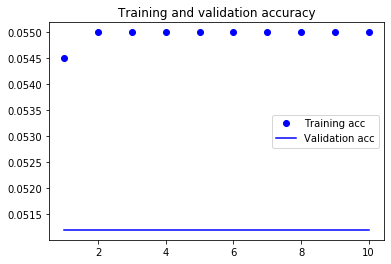

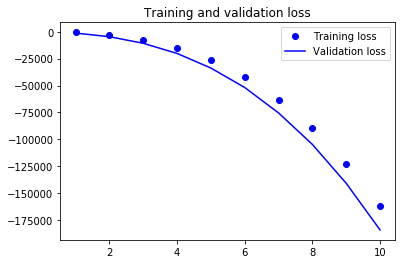

In [116]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [112]:
!ls

Arabic Book Reviews Sentiment Analysis.ipynb
Books Reviews garage.ipynb
Books Reviews.ipynb
Clustering-reviews.ipynb
__pycache__
book_review.db
cdf.ipynb
data
libs
output
python_tutorial
